In [4]:
import tensorflow as tf
tf.enable_eager_execution()

tf.__version__

'1.14.0'

In [5]:
AUTOTUNE=tf.data.experimental.AUTOTUNE

In [6]:
import pathlib
#help(tf.keras.utils.get_file)

data_root = '/tf/notebooks/tf_official/load_data/flower_photos'
data_root = pathlib.Path(data_root)
#help(pathlib.Path)
for item in data_root.iterdir():
    print(item)

data_root

/tf/notebooks/tf_official/load_data/flower_photos/tulips
/tf/notebooks/tf_official/load_data/flower_photos/daisy
/tf/notebooks/tf_official/load_data/flower_photos/roses
/tf/notebooks/tf_official/load_data/flower_photos/LICENSE.txt
/tf/notebooks/tf_official/load_data/flower_photos/dandelion
/tf/notebooks/tf_official/load_data/flower_photos/sunflowers


PosixPath('/tf/notebooks/tf_official/load_data/flower_photos')

In [7]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
all_image_paths
random.shuffle(all_image_paths)
#help(random.shuffle)
all_image_paths
image_count = len(all_image_paths)
image_count

3670

In [8]:
all_image_paths[:10]

['/tf/notebooks/tf_official/load_data/flower_photos/roses/13235124703_a7e1266e44.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/daisy/5602738326_97121e007d_n.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/sunflowers/19784656639_cd7f0a4a26_m.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/dandelion/4560663938_3557a1f831.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/dandelion/6019234426_d25ea1230a_m.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/roses/2059172936_032ffc12aa.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/dandelion/14455605089_8bbfb41cd7_n.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/sunflowers/5037790727_57c527494f.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/dandelion/3465599902_14729e2b1b_n.jpg',
 '/tf/notebooks/tf_official/load_data/flower_photos/dandelion/19599413676_fc9ee2640e.jpg']

In [9]:
import os
attributions = (data_root/"LICENSE.txt").open(encoding='utf-8').readlines()[4:]
attributions = [line.split(' CC-BY') for line in attributions]
attributions = dict(attributions)

attributions


{'daisy/7568630428_8cf0fc16ff_n.jpg': ' by A Guy Taking Pictures - https://www.flickr.com/photos/80901381@N04/7568630428/\n',
 'daisy/7410356270_9dff4d0e2e_n.jpg': ' by martinak15 - https://www.flickr.com/photos/martinaphotography/7410356270/\n',
 'daisy/4286053334_a75541f20b_m.jpg': ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4286053334/\n',
 'daisy/10770585085_4742b9dac3_n.jpg': ' by Thangaraj Kumaravel - https://www.flickr.com/photos/kumaravel/10770585085/\n',
 'daisy/8759177308_951790e00d_m.jpg': ' by Marina del Castell - https://www.flickr.com/photos/marinadelcastell/8759177308/\n',
 'daisy/4131565290_0585c4dd5a_n.jpg': ' by jenny downing - https://www.flickr.com/photos/jenny-pics/4131565290/\n',
 'daisy/3504430338_77d6a7fab4_n.jpg': ' by Dhilung Kirat - https://www.flickr.com/photos/dhilung/3504430338/\n',
 'daisy/3084924076_4d5c5711af_m.jpg': ' by Bùi Linh Ngân - https://www.flickr.com/photos/linhngan/3084924076/\n',
 'daisy/2642408410_61545fdc83_n.jpg': ' by D

In [10]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return "Image (CC BY 2.0)" + \
            ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])

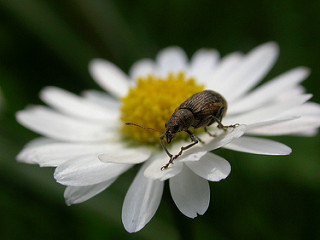

Image (CC BY 2.0) by Geert Orye


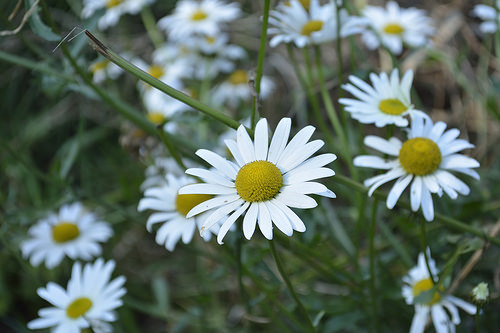

Image (CC BY 2.0) by KFCSpike


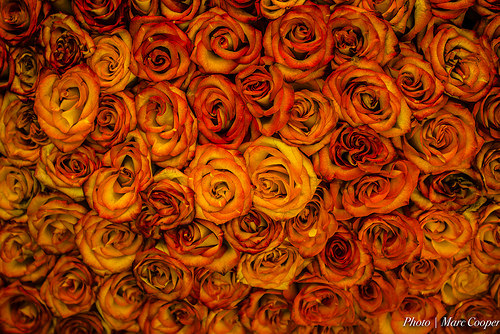

Image (CC BY 2.0) by Marc Cooper


In [11]:
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print(caption_image(image_path))

In [12]:
label_names = sorted(item.name for item in data_root.glob('*/')
                                  if item.is_dir())
label_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [13]:
label_to_index = dict(
    (name, index) for index, name in enumerate(label_names)
)
label_to_index 

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [14]:
a = enumerate(label_names)
a
#help(a)

In [15]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                       for path in all_image_paths]
print('first 10 labels indices', all_image_labels[:10])

first 10 labels indices [2, 0, 3, 1, 1, 2, 1, 3, 1, 1]


In [16]:
image_path = all_image_paths[1]
print(image_path)
img_raw = tf.io.read_file(image_path)
#print(repr())
print(repr(img_raw)[:100]+'...')

img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

/tf/notebooks/tf_official/load_data/flower_photos/daisy/5602738326_97121e007d_n.jpg
<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...
(240, 320, 3)
<dtype: 'uint8'>


In [17]:
img_final = tf.image.resize(img_tensor,[192,192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
1.0


In [18]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image,[192,192])
    image /= 255.0 #normalize to [0, 1] range
    return image

In [19]:
def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return preprocess_image(image) 

In [20]:
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]
print(img_path)
print(label)


plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()


/tf/notebooks/tf_official/load_data/flower_photos/roses/13235124703_a7e1266e44.jpg
2



In [21]:
all_image_paths
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
print('shape:', repr(path_ds.output_shapes))
print('type:', repr(path_ds.output_types))
print(path_ds)


W0803 13:17:32.916469 140678305322816 deprecation.py:323] From <ipython-input-21-8267635fadbd>:3: DatasetV1.output_shapes (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
W0803 13:17:32.919751 140678305322816 deprecation.py:323] From <ipython-input-21-8267635fadbd>:4: DatasetV1.output_types (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.


shape: TensorShape([])
type: tf.string
<DatasetV1Adapter shapes: (), types: tf.string>


In [22]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

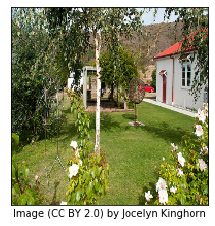

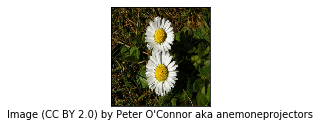

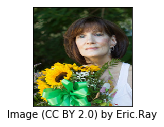

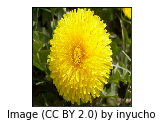

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
    plt.subplot(2, 2, n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(caption_image(all_image_paths[n]))
    plt.show()

In [24]:
label_ds=tf.data.Dataset.from_tensor_slices(
            tf.cast(all_image_labels,tf.int64))
for label in label_ds.take(10):
    print(label_names[label.numpy()])

roses
daisy
sunflowers
dandelion
dandelion
roses
dandelion
sunflowers
dandelion
dandelion


In [25]:
image_label_ds = tf.data.Dataset.zip((image_ds,label_ds))
print(image_label_ds)

<DatasetV1Adapter shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


In [26]:
ds = tf.data.Dataset.from_tensor_slices(
    (all_image_paths, all_image_labels))
# The tuples are unpacked into the positional arguments of the mapped
# function
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<DatasetV1Adapter shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [27]:
BATCH_SIZE=32
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)

#prefetch lets the dataset fetch batches, in the background
# while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int32)>

In [28]:
ds=image_label_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds=ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

W0803 13:17:33.701059 140678305322816 deprecation.py:323] From <ipython-input-28-43ef8593ff18>:2: shuffle_and_repeat (from tensorflow.python.data.experimental.ops.shuffle_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int32)>

In [29]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

In [30]:
def change_range(image, label):
    return 2*image-1, label
keras_ds = ds.map(change_range)

In [31]:
image_batch, label_batch = next(iter(keras_ds))

In [32]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 6, 6, 1280)


In [33]:
model=tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(label_names),activation='softmax')
])

In [34]:
logit_batch = model(image_batch).numpy()
print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print("shape:", logit_batch.shape)

min logit: 0.0058875633
max logit: 0.8300812
shape: (32, 5)


In [35]:
model.compile(optimizer=tf.train.AdamOptimizer(),
            loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])

In [36]:
len(model.trainable_variables)

2

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [38]:
steps_per_epoch=tf.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

115.0

In [40]:
model.fit(ds, epochs=1, steps_per_epoch=3)

3/3 [==============================] - 15s 5s/step - loss: 0.7903 - acc: 0.7500


In [47]:
import time

def timeit(ds, batches=2*steps_per_epoch+1):
    overall_start = time.time()
    it = iter(ds.take(batches+1))
    next(it)
    
    start = time.time()
    for i,(images,labels) in enumerate(it):
        if i%10 == 0:
            print('.',end='')
    print()
    end=time.time()
    
    duration=end-start
    print("{} batches: {} s".format(batches,duration))
    print("{:0.5f} Images/s".format(BATCH_SIZE*batches/duration))
    print("Total time:{}s".format(end-overall_start))

In [41]:
ds = image_label_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))

ds=ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 192, 192, 3), (?,)), types: (tf.float32, tf.int32)>

In [46]:
timeit(ds)

........................
231.0 batches: 1564842216.1352293 s
0.00000 Images/s
Total time:37.92043471336365s
